# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

Import the necessary libraries and create your dataframe(s).

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("mxmh_survey_results copy.csv")

#i'm importing the same libraries from checkpoint 2 to do my work here
#i also made a copy of my original csv file to add to the new checkpoint folder to work on

In [16]:
pd.set_option('display.max_columns', None)
df.head(11)

#I'm using this code here in a seperate cell so that I am able to quickly look back and forth at my dataset and reference the information as needed
#this code in particular will allow me to see all columns of my data at once instead of a limited view

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,95.0,Never,Never,Rarely,Never,Never,Very frequently,Rarely,Very frequently,Never,Sometimes,Never,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,94.0,Never,Very frequently,Never,Sometimes,Never,Never,Never,Never,Never,Never,Very frequently,Never,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,155.0,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Rarely,Never,Rarely,Rarely,Never,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [17]:
# pd.set_option('display.max_columns', None)
#This code will allow me to see all available columns with the row info since the code editor does not show all of them with just the 'df.head()' code

#df.shape: 736 rows, 33 columns, making a basic note here as a reminder of how much data I am working with

df.isnull().sum() #BPM column has most null values (107) however since this column is based on survey info that was optional for the responder to fill, it still holds important info for later use
#The music effects column has 8 null values, however I don't believe that it will negatively effect the outcome of the analysis since it is such a small amount  
#The other columns that have missing data are the age, primary streaming service, while working, instrumentalist, composer, and foreign language columns
#These columns all have < 5 null values in total which I do not believe will require them to be discarded


#df.duplicated().value_counts() 
#There are no duplicates in the data to remove


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

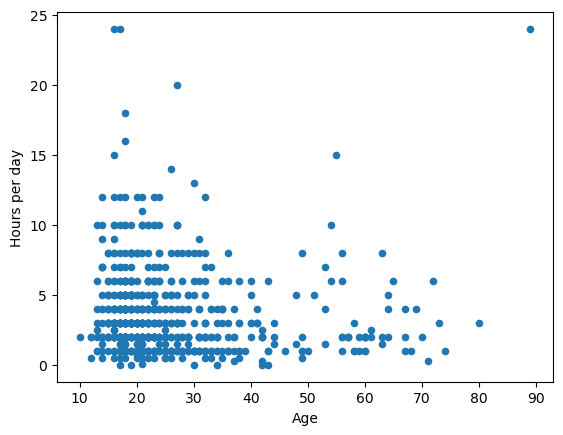

<AxesSubplot:xlabel='Age', ylabel='Hours per day'>

In [71]:
#df['Hours per day'].describe()
#I want to find out if there is any data that might skew the amount of hours that certain music genres are listened to 
#based on the output, there is an outlier where the max amount of hours listened is 24 hours, which is unusual since people often listen to music in sessions and not for the entire day

#I am going to make a scatter plot to vizualize the outlier and see how many are present in the data 
#df.head(740).plot(x= 'Age', y= 'Hours per day', kind = 'scatter')
#Based on the chart output, there are two outliers in which a respondent listened to music for 20-25 hours straight, which will effect the result when trying to answer
#the question of which music genres are listened to the most
#one of the respondents was at age 90, so it is highly possible there was an input error on their survey

#I am going to run a code that orders the data by the 'hours per day' column with the largest hour amounts at the top to see what genres are associated with these numbers
#df.sort_values(by=['Hours per day'], ascending=False).head()
#based on the output, the rock and rap genres are the two that have the outlier hour amount compared to the rest of the survery results, which will need to be 
#considered when answering the question of which music genres are most popular amongst users since it could be interpreted that the highlt listening volume correlates 
#to how popular a music genre is 

#the previous visualization can also be used when looking at the age distribution of the survey respondents
#I wanted to see if there were any ages that were outliers that might skew data on which age ranges would msot likely watch and interact with a product ad
#when answering a question regarding what age range is most most marketed towards for a specific ad (which is one of my business questions)
#the results of the graph are also important at it shows which age ranges will be most likely to engage in future electronic surveys and be present when watching these ads
#to give potential feedback or engage with a product 

#since the data does have 4 other columns with numerical data (outside of the BPM since it has so may null values) I will also use a scatterplot to 
#detect if there are any outliers here
#while the data is in a scale range, I want to make sure that no respondents put info outside of the 1-10 range that might skew the data
#I've run the scatterplot through each mental health condition and found no outliers
#df.head(300).plot(x= 'Depression', y= 'Hours per day', kind = 'scatter')


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [67]:
#df['Permissions'].unique()
#df['Permissions'].value_counts()
#I am considering removing the permissions table and I wanted to check for any unique values in case a responder chose against giving consent for their info to be used 
#it looks like all of the responders gave consent for their results to be used, for now I will keep the column although since the data is all under the same permission grant this column may be removed in the future

#df.drop(['Timestamp'], axis=1)
#I am going to remove the 'Timestamp' column since the information here is not relevant to the analysis

#I have also decided to remove the 'instrumentalist' and 'composer' columns since the dataset info shows that these represent whether the responder plays an 
#instrument or composes music on their own, which is also irrelevant to the business questions and analysis questions being asked for this dataset
# df2 = df.drop(['Instrumentalist', 'Composer'], axis=1)
# df2.head()


,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,Spotify,3.0,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,63.0,Pandora,1.5,Yes,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,18.0,Spotify,4.0,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [86]:
# df['Fav genre'].hist(bins=35, figsize=(25, 10), color = ['purple'])
# plt.xlabel('Most Popular Genres', fontsize=15)
# plt.ylabel('Number of Users', fontsize=15)
# df2.plot.bar()

#I wanted to run a bar chart here that I implemented from checkpoint 2 to see if there were any inconsistencies in the number of users putting their 
#music genre interests on the survey. it seems like rock music stands out above the rest, however this might prove to be a consistent theme when factoring in
#things like 'hours per day' where rock music has a few outliers showing that streams lasted 24 hours straight

#since a majority of this data seems to be non-mumerical, i may have to change some of the values to be on a numerical scale later
#I am going to wait until I get deeper into the vizualization phase on tableau to see if more data cleaning needs work


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? I did find some data that needed to be removed to being irrelevant to analysis. I also found that some data might need to be converted to numerical values, however analyses will still be able to be completed for now
2. Did the process of cleaning your data give you new insights into your dataset?  yes, I found that there were actually many outliers present that could skew results a bit when looking at the entire column
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? I want to make note of the survey responses that are on ranges of 'never' to 'frequently' as these inputs might need to be converted to numerical values if errors are given at later stages of the project.